In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [31]:
#Loading the dataset
df=pd.read_csv("C:/Users/User/Downloads/Admission_Predict_Ver1.1.csv")

In [32]:
#Visualozing the data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [33]:
df=df.drop(['Serial No.'], axis=1)

In [34]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [35]:
#Seprating the dataset into x and y values
x=df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y=df[['Chance of Admit ']]

In [38]:
print(x.shape)
print(y.shape)

(500, 7)
(500, 1)


In [36]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [37]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [39]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [41]:
df.corr().round(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.00,0.83,0.64,0.61,0.52,0.83,0.56,0.81
TOEFL Score,0.83,1.00,0.65,0.64,0.54,0.81,0.47,0.79
University Rating,0.64,0.65,1.00,0.73,0.61,0.71,0.43,0.69
SOP,0.61,0.64,0.73,1.00,0.66,0.71,0.41,0.68
LOR,0.52,0.54,0.61,0.66,1.00,0.64,0.37,0.65
CGPA,0.83,0.81,0.71,0.71,0.64,1.00,0.50,0.88
Research,0.56,0.47,0.43,0.41,0.37,0.50,1.00,0.55
Chance of Admit,0.81,0.79,0.69,0.68,0.65,0.88,0.55,1.00


<AxesSubplot:>

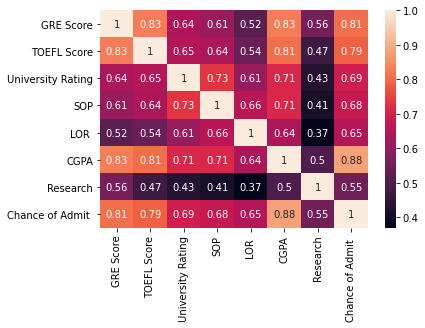

In [54]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr().round(2),annot=True)

<AxesSubplot:>

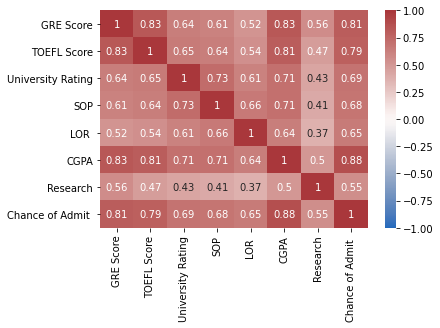

In [56]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr().round(2),annot=True,vmin=-1,vmax=1,cmap="vlag")

In [58]:
import numpy as np
matrix=df.corr().round(2)
mask=np.triu(np.ones_like(matrix,dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

<AxesSubplot:>

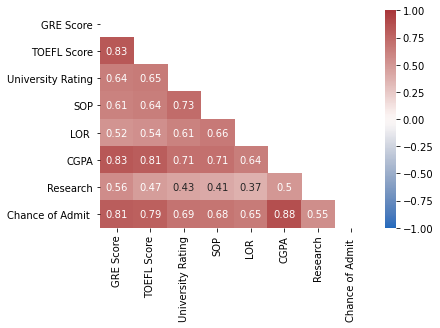

In [61]:
sns.heatmap(matrix,annot=True,vmax=1,vmin=-1,cmap="vlag",mask=mask)

In [62]:
matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.00,0.83,0.64,0.61,0.52,0.83,0.56,0.81
TOEFL Score,0.83,1.00,0.65,0.64,0.54,0.81,0.47,0.79
University Rating,0.64,0.65,1.00,0.73,0.61,0.71,0.43,0.69
SOP,0.61,0.64,0.73,1.00,0.66,0.71,0.41,0.68
LOR,0.52,0.54,0.61,0.66,1.00,0.64,0.37,0.65
CGPA,0.83,0.81,0.71,0.71,0.64,1.00,0.50,0.88
Research,0.56,0.47,0.43,0.41,0.37,0.50,1.00,0.55
Chance of Admit,0.81,0.79,0.69,0.68,0.65,0.88,0.55,1.00


In [64]:
matrix=df.corr()
matrix=matrix.unstack()
matrix[abs(matrix)>=0.6]

GRE Score          GRE Score            1.000000
                   TOEFL Score          0.827200
                   University Rating    0.635376
                   SOP                  0.613498
                   CGPA                 0.825878
                   Chance of Admit      0.810351
TOEFL Score        GRE Score            0.827200
                   TOEFL Score          1.000000
                   University Rating    0.649799
                   SOP                  0.644410
                   CGPA                 0.810574
                   Chance of Admit      0.792228
University Rating  GRE Score            0.635376
                   TOEFL Score          0.649799
                   University Rating    1.000000
                   SOP                  0.728024
                   LOR                  0.608651
                   CGPA                 0.705254
                   Chance of Admit      0.690132
SOP                GRE Score            0.613498
                   T

In [65]:
pd.DataFrame.describe(df)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [66]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [79]:
#Create training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=245)

In [80]:
#Training the model
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [81]:
#Predicting the model
y_pred =model.predict(x_test)

In [82]:
#MSE and R2-square
mse=(mean_squared_error(y_test,y_pred))
rmse=np.math.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print('MSE  Value: {}'.format(mse))
print('RMSE Value: {}'.format(rmse))
print('R2  Value: {}'.format(r2))

MSE  Value: 0.0026813968810918297
RMSE Value: 0.05178220622078428
R2  Value: 0.877634367510238


In [83]:
#Standardization

scaler=StandardScaler()
scaled=scaler.fit_transform(df)
df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']]=scaler.fit_transform(df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']])
print(df)

     GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0     1.819238     1.778865           0.775582  1.137360  1.098944  1.776806   
1     0.667148    -0.031601           0.775582  0.632315  1.098944  0.485859   
2    -0.041830    -0.525364          -0.099793 -0.377773  0.017306 -0.954043   
3     0.489904     0.462163          -0.099793  0.127271 -1.064332  0.154847   
4    -0.219074    -0.689952          -0.975168 -1.387862 -0.523513 -0.606480   
..         ...          ...                ...       ...       ...       ...   
495   1.376126     0.132987           1.650957  1.137360  0.558125  0.734118   
496   1.819238     1.614278           1.650957  1.642404  1.639763  2.140919   
497   1.198882     2.108041           1.650957  1.137360  1.639763  1.627851   
498  -0.396319    -0.689952           0.775582  0.632315  1.639763 -0.242367   
499   0.933015     0.955926           0.775582  1.137360  1.098944  0.767220   

     Research  Chance of Admit   
0    

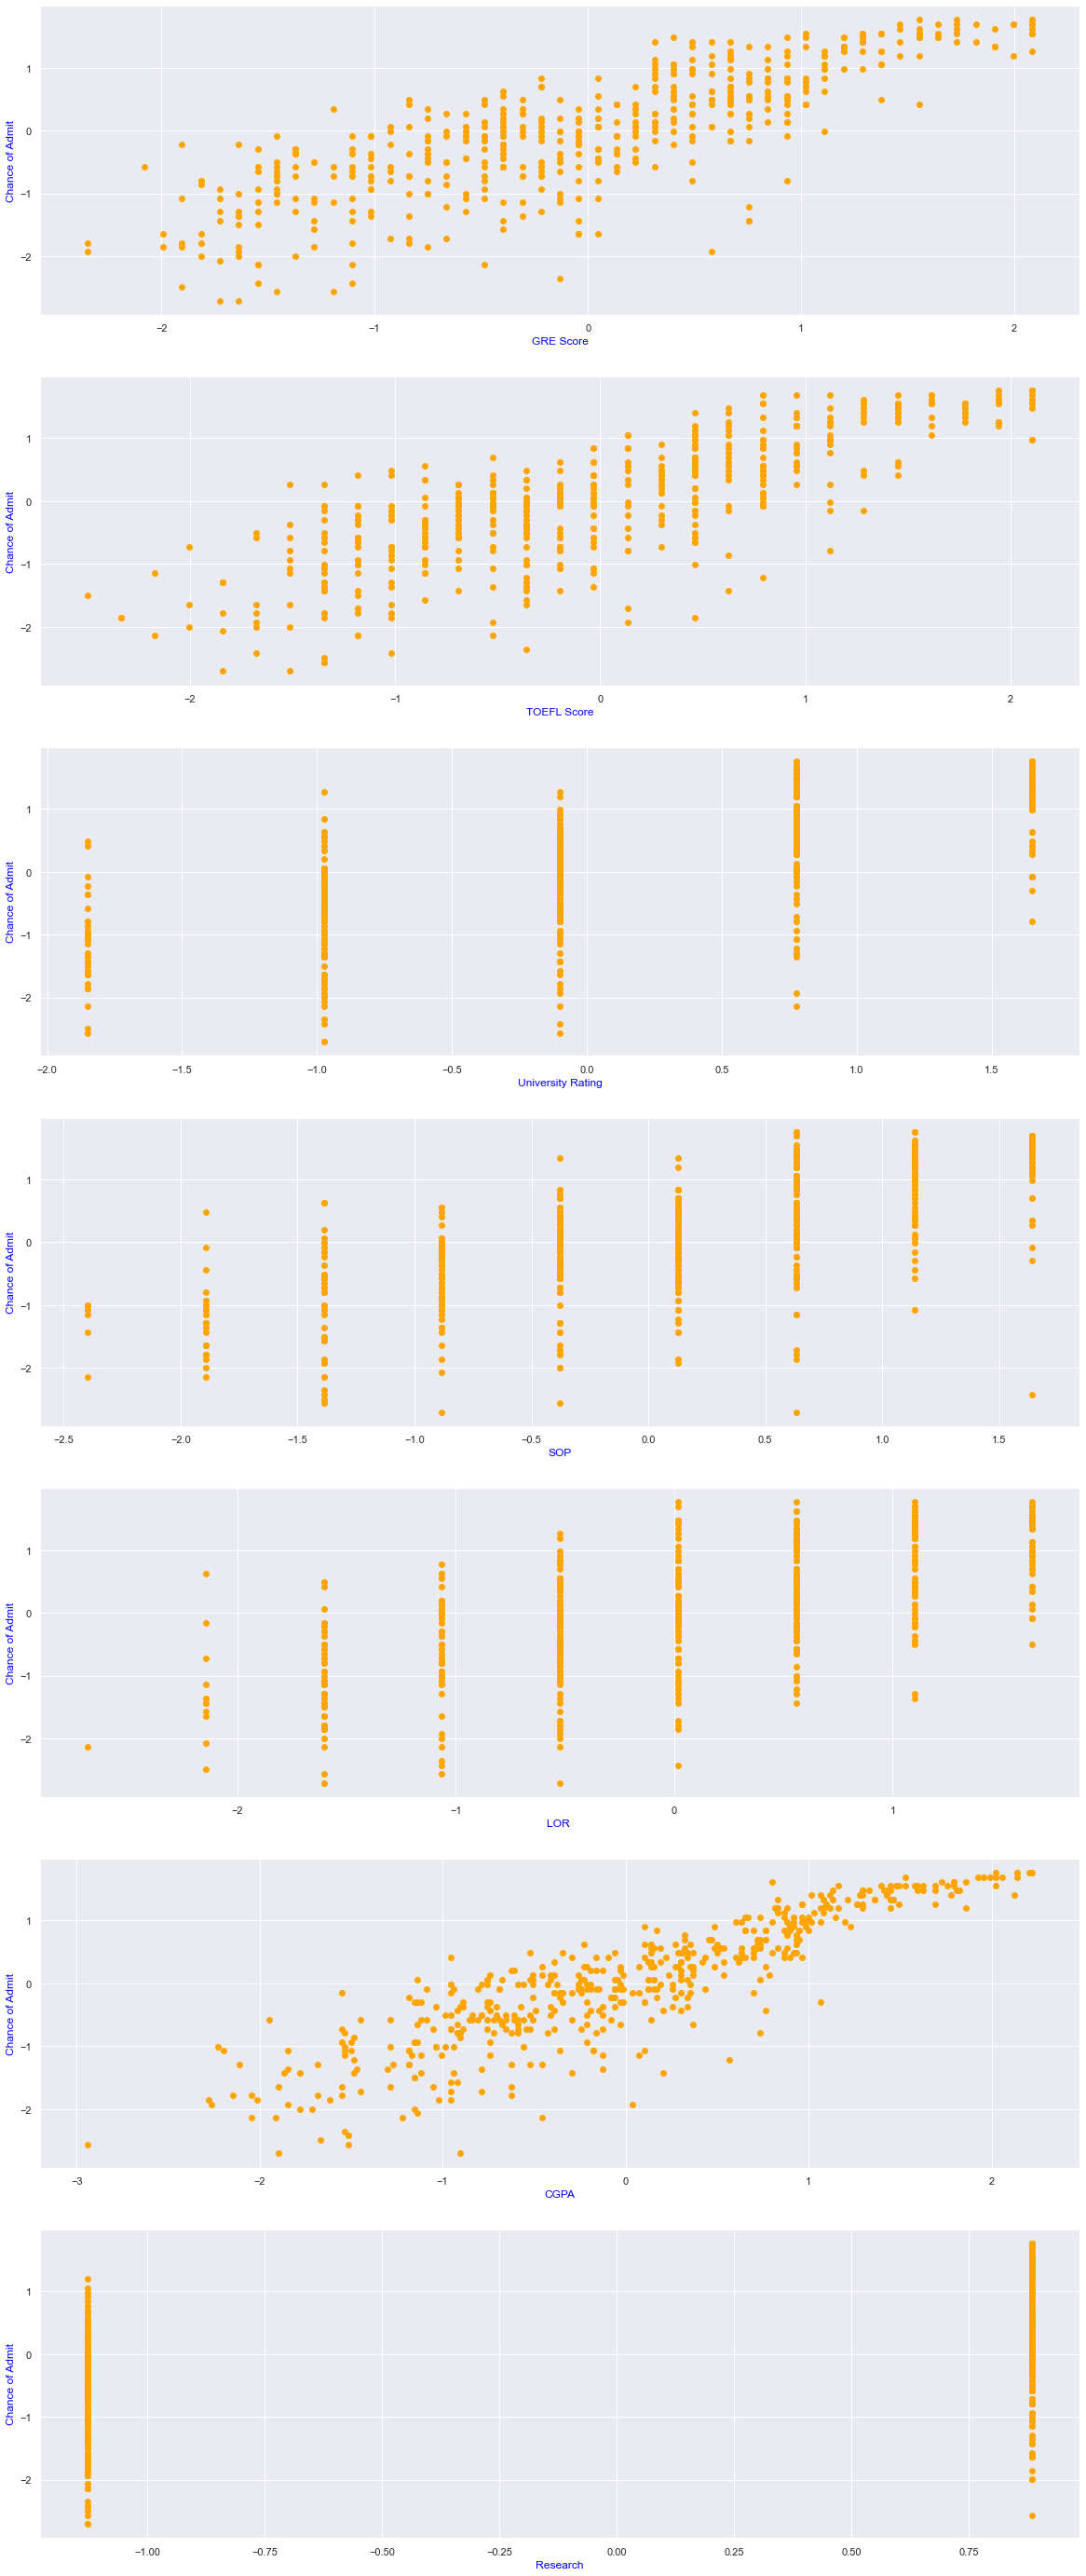

In [84]:
#Scatter Plot
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
target=df[['Chance of Admit ']]
for i,col in enumerate(features):
    sns.set(rc={'figure.figsize':(20,50)})
    plt.subplot(len(features),1,i+1)
    
    a=df[col]
    b=target
    plt.scatter(a,b,marker='o',color="orange")
    plt.xlabel(col,color='blue')
    plt.ylabel('Chance of Admit',color='blue')

plt.show()

In [85]:
#Training the model
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [86]:
#Predicting the model
y_pred =model.predict(x_test)

In [87]:
#MSE,RMSE and R2-square
mse=np.math.sqrt(mean_squared_error(y_test,y_pred))
rmse=((mean_squared_error(y_test,y_pred)))
r2=r2_score(y_test,y_pred)
print('MSE Value: {}'.format(mse))
print('RMSE Value: {}'.format(rmse))
print('R2  Value: {}'.format(r2))

MSE Value: 0.05178220622078428
RMSE Value: 0.0026813968810918297
R2  Value: 0.877634367510238


In [99]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=400)
model.fit(x_train,y_train)

<ipython-input-99-4bfece364eec>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=400)

In [100]:
y_pred=model.predict(x_test)

In [101]:
from sklearn.metrics import r2_score
r2score=r2_score(y_test,y_pred)
print("R2-Score",r2score*100)

R2-Score 84.2023972709795


In [102]:
x=[[314,103,2,2.0,3.0,8.21,0]]

result=model.predict(x)
result

array([0.6419])

In [103]:
mse=np.math.sqrt(mean_squared_error(y_test,y_pred))
rmse=((mean_squared_error(y_test,y_pred)))
r2=r2_score(y_test,y_pred)

print('MSE Value: {}'.format(mse))
print('RMSE Value: {}'.format(rmse))
print('R2  Value: {}'.format(r2))

MSE Value: 0.058836443691389004
RMSE Value: 0.003461727106249989
R2  Value: 0.842023972709795
